**Installing TensorFlow 2.0**

In [1]:
!pip install tensorflow==2.0.0-rc0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Loading Cancer Dataset**

In [0]:
cancer = datasets.load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer.target

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
print(X.shape)

(569, 30)


In [12]:
print(y.shape)

(569,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train[0]

array([ 0.32315784,  2.57618342,  0.4857203 ,  0.19194201,  0.66421616,
        2.00494008,  2.17536136,  1.21130731,  1.20632928,  1.30184276,
       -0.53029677, -0.00644456, -0.24670324, -0.40036138, -0.79006026,
        1.28234155,  1.54143653,  0.71301503,  0.11989108,  0.92537936,
        0.27442622,  2.74323225,  0.65437528,  0.07429717,  0.44573443,
        3.44722691,  4.34493009,  1.87472301,  2.06952401,  3.251885  ])

**Deep Learning Model**

In [0]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train[0].shape)))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(34, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size=100, epochs=100)

Train on 455 samples
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
455/455 [==============================] - 2s 5ms/sample - loss: 0.8297 - accuracy: 0.5341
Epoch 2/100
455/455 [==============================] - 0s 84us/sample - loss: 0.8024 - accuracy: 0.5385
Epoch 3/100
455/455 [==============================] - 0s 75us/sample - loss: 0.8124 - accuracy: 0.5473
Epoch 4/100
455/455 [==============================] - 0s 77us/sample - loss: 0.7794 - accuracy: 0.5912
Epoch 5/100
455/455 [==============================] - 0s 76us/sample - loss: 0.7993 - accuracy: 0.5714
Epoch 6/100
455/455 [==============================] - 0s 85us/sample - loss: 0.7439 - accuracy: 0.5846
Epoch 7/100
455/455 [==============================] - 0s 82us/sample - loss: 0.7372 - accuracy: 0.6066
Epoch 8/100
455/455 [==============================] - 0s 73us/sample - loss: 0.7629 - accuracy: 0.5780
Epoch 9/100
455/455 [==============================] -

In [0]:
## Plotting Accuracy with No. of Epochs

Text(0, 0.5, 'Accuracy')

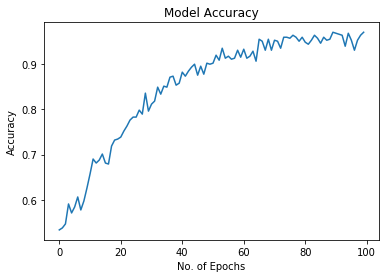

In [22]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

In [0]:
## Plotting Loss with No. of Epochs

Text(0, 0.5, 'Loss')

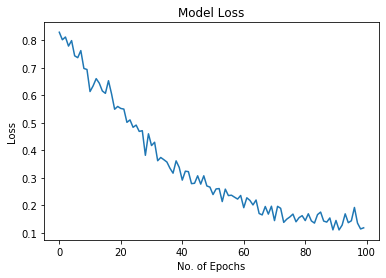

In [24]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [0]:
y_pred = model.predict_classes(X_test)

In [26]:
print(accuracy_score(y_test, y_pred))

0.9385964912280702
